# Progress Meeting 7. Jan

## 0. Recap
- infected_graph = infection_simulation(Graph)
- BFS Trees from all nodes, calculate subtree nodecount and node count product
![](progress_pictures/rumor_cent_formular.png)

## 1. Cleanup of functional code, decision between networkx and raw implementation

![Networkx Runtime vs Raw Implementation Runtime](progress_pictures/networkx_vs_raw_runtimes.jpg)

## 2. Factorial Overflow Errors

In [6]:
import math
float(math.factorial(170))

7.257415615307999e+306

In [7]:
float(math.factorial(171))

OverflowError: int too large to convert to float

## 3. There can be multiple BFS trees from a node!

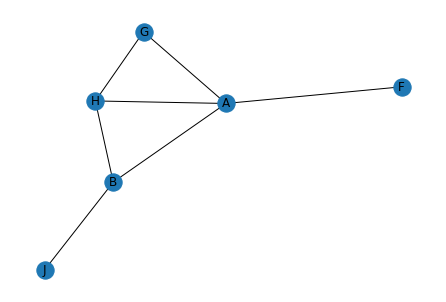

In [23]:
import networkx as nx
g = nx.Graph()
g.add_node("A")
g.add_node("B")
g.add_node("F")
g.add_node("G")
g.add_node("H")
g.add_node("J")

g.add_edge("A", "B")
g.add_edge("A", "F")
g.add_edge("A", "G")
g.add_edge("A", "H")

g.add_edge("B", "H")
g.add_edge("B", "J")

g.add_edge("G", "H")

nx.draw(g, with_labels=True)

## 4. Basic Hop Distance Calculation

In [26]:
import rumor_centrality.rumor_detection as raw
import rumor_centrality.jordan_center_alternative as jo


from rumor_centrality.graph_simulations import si

from networkx import shortest_path_length


time = 10
infection_prob = 0.1
infection_centers_count = 1

In [20]:
from rumor_centrality.graph_generator import internet


infected_g, c = si(internet(), time, infection_prob, infection_centers_count)
print(f"infected nodes: {len(infected_g.nodes)}")
print(f"Original Infection Center: {c}")

adj_list = raw.networkx_graph_to_adj_list(infected_g)

rc_prediction = raw.get_center_prediction(adj_list, use_fact=False)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"RC Infection Center: {rc_prediction}")
print(f"Hop Distance: {hops}")

jo_prediction = jo.centers_by_jordan_center(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"JO Infection Center: {jo_prediction}")
print(f"Hop Distance: {hops}")

bc_prediction = jo.centers_by_betweenness_centrality(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"BC Infection Center: {bc_prediction}")
print(f"Hop Distance: {hops}")

dc_prediction = jo.centers_by_distance_centrality(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"DC Infection Center: {dc_prediction}")
print(f"Hop Distance: {hops}")

infected nodes: 2935
Original Infection Center: [794]
RC Infection Center: [207]
Hop Distance: 2
JO Infection Center: [1, 2, 4, 9, 10, 21, 51, 475, 551, 1112, 1119, 1481, 920]
Hop Distance: 2
BC Infection Center: [1]
Hop Distance: 2
DC Infection Center: [1]
Hop Distance: 2


In [21]:
from rumor_centrality.graph_generator import us_power_grid


infected_g, c = si(us_power_grid(), time, infection_prob, infection_centers_count)
print(f"infected nodes: {len(infected_g.nodes)}")
print(f"Original Infection Center: {c}")

adj_list = raw.networkx_graph_to_adj_list(infected_g)

rc_prediction = raw.get_center_prediction(adj_list, use_fact=False)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"RC Infection Center: {rc_prediction}")
print(f"Hop Distance: {hops}")

jo_prediction = jo.centers_by_jordan_center(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"JO Infection Center: {jo_prediction}")
print(f"Hop Distance: {hops}")

bc_prediction = jo.centers_by_betweenness_centrality(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"BC Infection Center: {bc_prediction}")
print(f"Hop Distance: {hops}")

dc_prediction = jo.centers_by_distance_centrality(infected_g)
hops = shortest_path_length(infected_g, c[0], rc_prediction[0])
print(f"DC Infection Center: {dc_prediction}")
print(f"Hop Distance: {hops}")

infected nodes: 1
Original Infection Center: [402]
RC Infection Center: [402]
Hop Distance: 0
JO Infection Center: [402]
Hop Distance: 0
BC Infection Center: [402]
Hop Distance: 0
DC Infection Center: [402]
Hop Distance: 0


### Hop Distances on a *scale free* graph with 1000 nodes (200 runs)

![](progress_pictures/metric_hop_distance_comparision.png)

## 5. Task - Reproduction
Networks:
- Tree Networks
    - Regular Trees
    - Geometric Trees (?)
- General Networks
    - Small World
    - Scale Free
- Real World Networks
    - Internet
    - US Power Grid

Methods:

- We assume that they simulate SI on trees as well.
- They so 1000 runs per virus graph size, per network
- Virus Graph Sizes for Trees: ? (read from plot)
- They stop simulation as soon as x nodes are infected
- Metric is correct_detections / all_detections in trees
- For graphs: Also hop_distance

## 6. Plan

- Continue Reproduction and Scalability Tests
- Work with Multiple Infection Centers
- Work with Other Infection Dynamics